# Feature Engineering

Feature Engineering is the process of using domain knowledge to select, modify, or create new features from raw data to improve the performance of machine learning models.

---

## Feature Transformation

Feature transformation involves changing the format, values, or distribution of features to make them more suitable for modeling. Two major tasks include:

1. **Encoding Categorical Data**
2. **Scaling Numerical Data**

---

## Types of Data

### 1. **Numerical Data**
- Data represented by numbers and can be continuous or discrete.

### 2. **Categorical Data**
- Data that consists of categories or labels.
- Further divided into:
  - **Nominal Data**: Categories with no inherent order.
    - Example: `['Red', 'Blue', 'Green']`
  - **Ordinal Data**: Categories with a meaningful order or ranking.
    - Example: `['Poor', 'Average', 'Good']`

---

## Encoding Categorical Data

### Ordinal Encoding

- Use **OrdinalEncoder** when dealing with **ordinal data** in **input (X)** features.
- You must specify the order of the categories manually.




In [13]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Quality': ['Poor', 'Average', 'Good'],
    'Education': ['School', 'UG', 'PG']
})

# Define order for each column
encoder = OrdinalEncoder(categories=[
    ['Poor', 'Average', 'Good'],
    ['School', 'UG', 'PG']
])

# Fit and transform
encoded_data = encoder.fit_transform(data)
encoded_df = pd.DataFrame(encoded_data, columns=['Quality', 'Education'])
print(encoded_df)

   Quality  Education
0      0.0        0.0
1      1.0        1.0
2      2.0        2.0


# Label Encoding

**Label Encoding** is used to convert **categorical labels** into **numerical form**, especially for the **target variable (y)**.

---

##  When to Use:
-  Use **LabelEncoder** when the **target variable (y)** is **categorical**.

---

##  What It Does:
- Converts **class labels** (e.g., `'cat'`, `'dog'`, `'mouse'`) into **numeric values** (e.g., `0`, `1`, `2`).
- Helps machine learning models work with categorical outputs.

---

##  When Not to Use:
- Do **not** use **Label Encoding** on **input features** (X) if there's **no inherent order** in the categories.  
  - Example: Encoding colors (`red`, `blue`, `green`) with `0`, `1`, `2` adds a false sense of order.

---

##  Better Alternatives for Input Features:
- Use **One-Hot Encoding** or **Ordinal Encoding** (only if order matters) for input features instead.

---


In [14]:
from sklearn.preprocessing import LabelEncoder

# Sample target data
y = ['Cat', 'Dog', 'Fish', 'Dog']

# Initialize encoder
label_encoder = LabelEncoder()

# Fit and transform
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)


[0 1 2 1]


## Summary

| Encoder        | Use Case                    | Data Type          | Applicable On   |
|----------------|-----------------------------|--------------------|-----------------|
| OrdinalEncoder | Ordered categories          | Ordinal            | Input features  |
| LabelEncoder   | Categorical target variable | Nominal/Ordinal    | Output (target) |




- Jab **input features** mein **ordered categorical data** ho to **OrdinalEncoder** lagana hota hai.  
- Aur jab **target variable (output y)** **categorical** ho to **LabelEncoder** use karte hain.


## How to Use OrdinalEncoder and LabelEncoder

### Step-by-Step: Using `OrdinalEncoder`

To use `OrdinalEncoder`, follow these steps:

1. **Import the Class**
   ```python
   from sklearn.preprocessing import OrdinalEncoder


In [16]:
from sklearn.preprocessing import OrdinalEncoder

## 🛠️ Create the Encoder Object

While creating the object, pass a parameter called `categories`, which contains **lists of the category values in order**.


In [17]:
encoder = OrdinalEncoder(categories=[
    ['Poor', 'Average', 'Good'],   # Ordered list for "Quality"
    ['School', 'UG', 'PG']         # Ordered list for "Education"
])


## 🔧 Fit and Transform the Training Data

You can now use `fit()` or `fit_transform()` on your training data.



In [18]:
import pandas as pd

train = pd.DataFrame({
    'Quality': ['Poor', 'Good', 'Average'],
    'Education': ['PG', 'UG', 'School']
})

encoded_train = encoder.fit_transform(train)
print(pd.DataFrame(encoded_train, columns=['Quality', 'Education']))


   Quality  Education
0      0.0        2.0
1      2.0        1.0
2      1.0        0.0


## 🧪 Use the Same Encoder to Transform Test Data

Use the same encoder that was fit on the training data to transform the test data.




In [19]:
test = pd.DataFrame({
    'Quality': ['Average', 'Good'],
    'Education': ['UG', 'PG']
})

encoded_test = encoder.transform(test)
print(pd.DataFrame(encoded_test, columns=['Quality', 'Education']))


   Quality  Education
0      1.0        1.0
1      2.0        2.0


##  Important Note on LabelEncoder

- `LabelEncoder` is used **only for target variables (output y)** that are **categorical**.
- It does **not take any parameter**.
- It **automatically assigns** a numerical value to each category,  
  but **you can’t control the order**.


In [20]:
from sklearn.preprocessing import LabelEncoder

y = ['Low', 'High', 'Medium', 'High']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)


[1 0 2 0]




**LabelEncoder** mein aap manually **order define nahi** kar sakte.  
Ye **automatic mapping** karta hai — kaun si value ko kaun sa number milega,  
wo aap **control nahi kar paate**.


## Encoding Nominal Categorical Data Using One Hot Encoder

### Example Dataset

Let's assume you have the following nominal categorical data:

| Id | Color |
|----|-------|
| 1  | Red   |
| 2  | Blue  |
| 3  | Green |
| 4  | Blue  |

Nominal data means **no natural ordering** among categories — "Red", "Blue", and "Green" are just labels without ranking.

---

### One Hot Encoding (OHE)

One Hot Encoding transforms these values into binary columns — each unique category becomes a separate column:

| Id | Color_Blue | Color_Green | Color_Red |
|----|------------|-------------|-----------|
| 1  | 0          | 0           | 1         |
| 2  | 1          | 0           | 0         |
| 3  | 0          | 1           | 0         |
| 4  | 1          | 0           | 0         |




In [21]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample data
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue']})

# Initialize OHE
encoder = OneHotEncoder(sparse_output=False)  # use sparse_output=False to get dense array

# Fit and transform
encoded_array = encoder.fit_transform(df[['Color']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Color']))
print(encoded_df)

   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0


##  Dummy Variable Trap

After **One Hot Encoding**, one column is typically dropped to avoid **multicollinearity**.

If you keep all `n` columns for `n` categories, they will form a **linear dependency**:

$$
\text{Color\_Red} + \text{Color\_Blue} + \text{Color\_Green} = 1 \quad \text{(Always)}
$$

This violates the **assumption of feature independence** in machine learning.

###  To avoid this:
- Drop **one dummy variable** column using `drop='first'` in encoders like `OneHotEncoder`.


In [22]:
encoder = OneHotEncoder(drop='first', sparse_output=False)


## High Cardinality Handling (Most Frequent Variables)

When a categorical column has too many unique values, and many of them appear **rarely**:

- It can **increase dimensionality**
- **Slow down processing**
- **Lead to overfitting**

---

### Solution:
Group less frequent categories into `"Others"` and apply **One Hot Encoding** only on frequent ones.

---

###  Visual Explanation

**Original Categories:**  
`['India', 'USA', 'UK', 'Germany', 'South Africa', 'Sri Lanka', 'Bhutan']`

**After Grouping:**  
`['India', 'USA', 'UK', 'Others']`


## Pandas vs Scikit-learn

| **Purpose**               | **Tool**                                | **Notes**                                           |
|---------------------------|-----------------------------------------|-----------------------------------------------------|
| Data Analysis             | `pd.get_dummies()`                     | Fast and easy, but doesn't store mappings           |
| ML Pipeline Training      | `sklearn.preprocessing.OneHotEncoder`  | Stores fitted mapping, preferred for production  

 ### In SHort :
`Pandas get_dummies()`**Baar-baar run karne par same input par alag output mil sakta hai (agar har baar encoder fit karein), isliye ML pipeline mein wahi fitted encoder reuse karo — Scikit-learn ka pipeline is cheez ka dhyan rakhta hai.** chahiye.


## Handling High Cardinality in Categorical Data

### Problem: High Cardinality

When a categorical feature has **too many unique categories**, it leads to:

- **High dimensionality** after encoding
- **Sparsity** (most values become zeros)
- **Longer training time**
- Potential **overfitting**

### Solution: Group Rare Categories into "Others"

**Approach:**
- Identify categories with **very low frequency**
- Replace them with a single common category like `"Others"`
- Apply One Hot Encoding after this grouping

> **Hinglish Tip:** Jab categories bahut zyada ho jaati hain aur kuchh categories me value bahut kam hoti hai,  
> toh un sabko combine karke `"Others"` bana diya jata hai. Isse processing tez ho jaati hai aur dimensionality bhi kam ho jaati hai.

#### Example

### Original Categories:
`['India', 'USA', 'UK', 'Germany', 'South Africa', 'Sri Lanka', 'Bhutan']`

### After Grouping:
`['India', 'USA', 'UK', 'Others']`




---

### Pandas `get_dummies()` vs Scikit-learn `OneHotEncoder`

| Aspect                        | Pandas (`get_dummies`) | Scikit-learn (`OneHotEncoder`) |
|-------------------------------|--------------------------|----------------------------------|
| Memory of mappings            | No                       | Yes                              |
| Reproducibility on new data   | Not guaranteed           | Guaranteed                       |
| Pipeline Integration          | Difficult                | Easy (via `ColumnTransformer`)  |
| Use in production             | Not preferred            | Preferred                        |

> **Why not use `get_dummies()` in ML pipelines?**
- Pandas doesn’t **remember** which column was at which index.
- If you run the same code with a slightly different dataset, column order may change — causing **model inconsistency**.


In [24]:
# Example using Scikit-learn OHE with handling unknowns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### Tip: `handle_unknown='ignore'`

`handle_unknown='ignore'` is useful when test data has unseen categories.  
It prevents errors by ignoring unknown categories.


### Category Grouping Example

**Before Grouping**          →         **After Grouping**  
`['A', 'B', 'C', 'D']`        →         `['A', 'B', 'Others']`  

**OHE →** 4 columns           →         **OHE →** 3 columns  


<div style="text-align: center; color: #28a745; font-weight: bold; font-size: 28px; border: 2px solid #28a745; padding: 10px; border-radius: 10px; display: inline-block;">
  🚀 Feature Scaling
</div>


## Feature Scaling

Feature Scaling is a **preprocessing technique** used to **normalize or standardize** the range of independent features (input variables) in your dataset.

Real-world datasets often contain features that vary in **magnitude**, **range**, and **units**. Feature scaling ensures that all features contribute **equally** to the model's learning process.

---

### Why Feature Scaling is Important?

- Algorithms like **KNN**, **K-Means**, **PCA**, and **Gradient Descent-based models** are sensitive to the scale of input data.
- Features with larger scales can **dominate** the learning process.
- Scaling helps:
  - Remove **scale disparities**
  - Improve **convergence speed**
  - Facilitate **fair distance measurements**
  - Handle **gradient descent efficiently**

---

## Types of Feature Scaling

### 1. Standardization (Z-score Normalization)

- Transforms data to have a **mean = 0** and **standard deviation = 1**
- Formula:

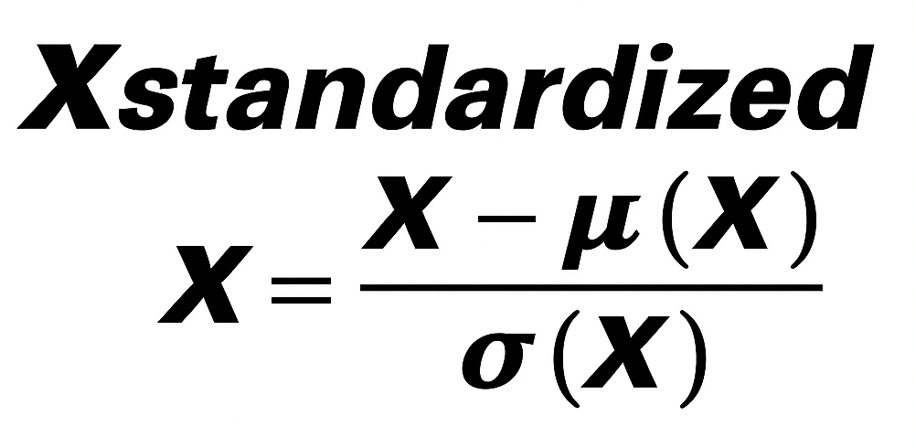

Shape of distribution is preserved

Best when data follows a normal distribution

Used In:
- K-Means Clustering
- K-Nearest Neighbors
- Principal Component Analysis (PCA)
- Neural Networks
- Gradient Descent

Advantages:
- Works well when outliers are minimal
- Makes distance-based models fair


## 2. Normalization (Min-Max Scaling)

Scales values between a fixed range, typically 0 to 1

### Formula:


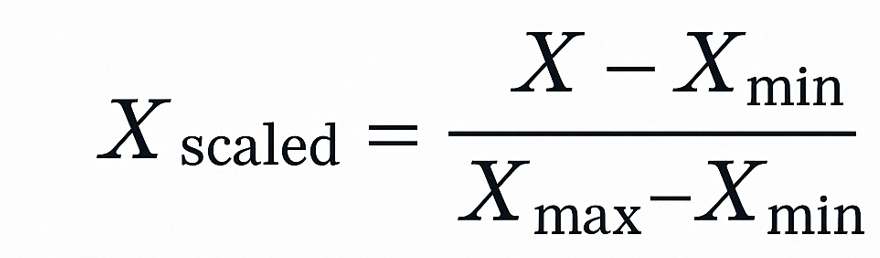

### Preserves the shape of distribution but not robust to outliers

**Used In:**
- Neural Networks (to speed up convergence)  
- Image pixel normalization


### 3. Robust Scaler

- Uses **median** and **interquartile range (IQR)** instead of mean/std  
- Good for datasets with **outliers**


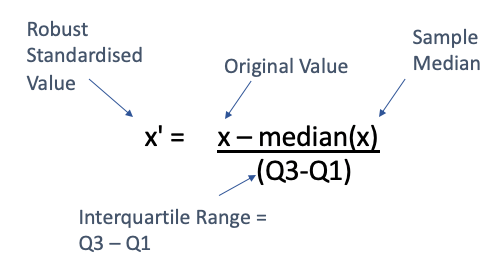

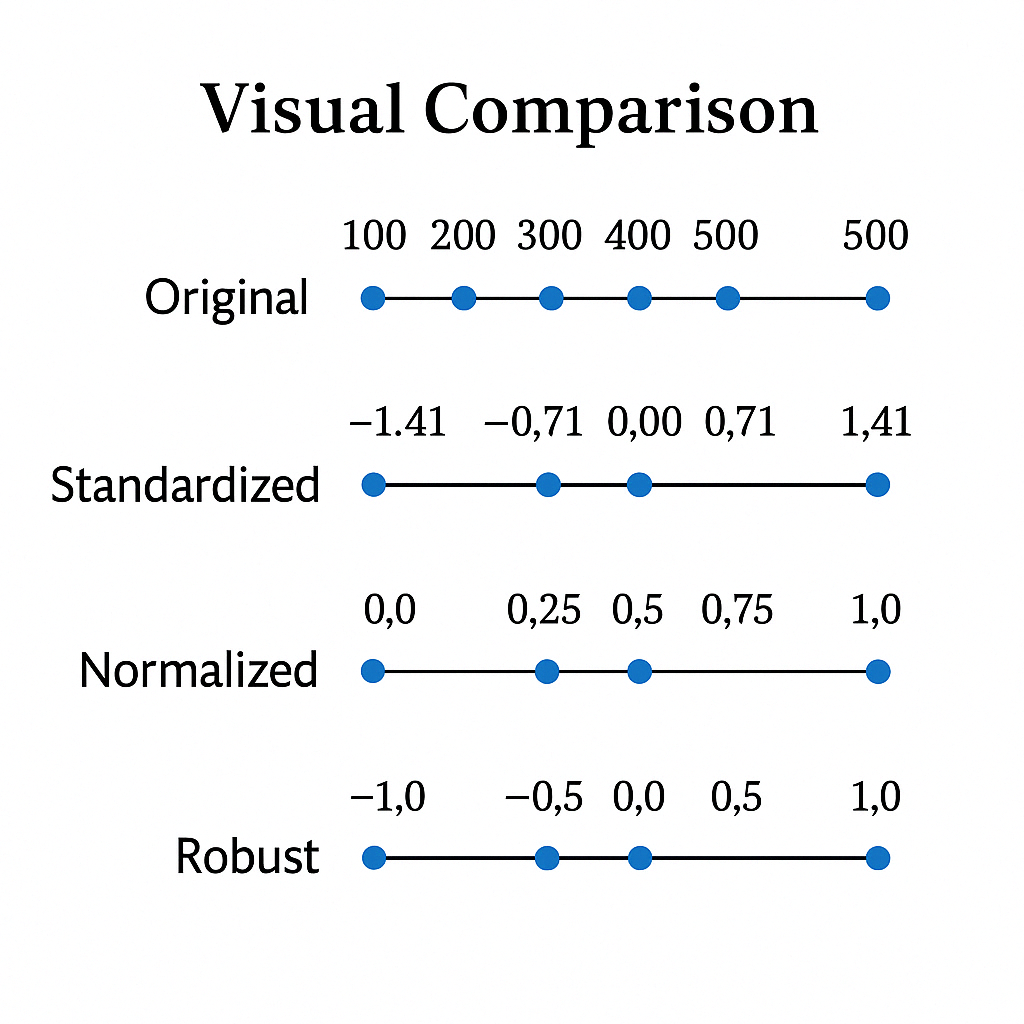

## Python Code Examples

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

data = pd.DataFrame({
    'Salary': [30000, 50000, 70000, 90000, 110000]
})

# Standardization
std_scaler = StandardScaler()
data['Standardized'] = std_scaler.fit_transform(data[['Salary']])

# Normalization
minmax_scaler = MinMaxScaler()
data['Normalized'] = minmax_scaler.fit_transform(data[['Salary']])

# Robust Scaling
robust_scaler = RobustScaler()
data['Robust'] = robust_scaler.fit_transform(data[['Salary']])

print(data)


   Salary  Standardized  Normalized  Robust
0   30000     -1.414214        0.00    -1.0
1   50000     -0.707107        0.25    -0.5
2   70000      0.000000        0.50     0.0
3   90000      0.707107        0.75     0.5
4  110000      1.414214        1.00     1.0


### Summary Table

| Technique         | Sensitive to Outliers | Preserves Distribution | Range       |
|------------------|------------------------|-------------------------|-------------|
| Standardization   | Yes                    | Yes                     | ~(-3, +3)   |
| Min-Max Scaling   | Yes                    | Yes                     | (0, 1)      |
| Robust Scaler     | No                     | No                      | Varies      |


### 🔍  Tip

Jab **features ke units alag-alag** hote hain (kisi ka *salary*, kisi ka *age*),  
tab **scale difference model ko confuse** karta hai.  

👉 Isliye **sabko ek hi scale par lana** zaroori hota hai using **feature scaling**.


## Normalization

**Normalization** is a technique commonly used during data preprocessing for machine learning tasks. Its primary goal is to **scale numeric columns** to a **common range**, ensuring that features with large values don’t dominate those with smaller ones.

Normalization helps in:
- **Preserving relationships** between data values
- **Maintaining the shape** of the distribution
- Avoiding distortion of data variability

---

### Why Normalize?

- Different features may have different units (e.g., age vs. salary)
- Algorithms using **distance metrics** (e.g., KNN, K-means) are sensitive to feature scales
- Normalization ensures **uniform contribution** of features to the model

---

### Types of Normalization

1. **Min-Max Scaling**
2. **Mean Normalization**
3. **Max-Absolute Scaling**
4. **Robust Scaling**

---

### 1. Min-Max Scaling

Min-Max Scaling transforms features to lie within a **specific range**, usually [0, 1].

#### Formula:

```python
X_scaled = (X - X.min()) / (X.max() - X.min())
```
### 🔧 Working (Min-Max Scaling)

1. Identify the **minimum** and **maximum** values of the feature  
2. Rescale all values to the range **[0, 1]**


In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample Data
data = pd.DataFrame({'Age': [15, 30, 45, 60, 75]})

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data['Age_Scaled'] = scaler.fit_transform(data[['Age']])

print(data)


   Age  Age_Scaled
0   15        0.00
1   30        0.25
2   45        0.50
3   60        0.75
4   75        1.00


### Hinglish Tip

Jab aapko **saare features ko ek jaisa scale dena** hota hai  
bina unke **beech ka relation lose kiye**,  
tab **normalization ka use** karte hain — especially **Min-Max Scaling**.


## Additional Types of Normalization

---

### 2. Mean Normalization

**Mean Normalization** scales data between **[-1, 1]** by centering it around the mean.

#### Formula:

```python
X_scaled = (X - X.mean()) / (X.max() - X.min())


### 📌 Characteristics (Standardization)

- Centers the data at **0**
- Resulting values lie between **-1 and 1**
- Useful when features have **similar distributions but different means**

### ✅ Advantages

- Converts data into **mean-centered** format  
- Removes **bias due to differing means**  
- Improves **model training stability**


### 3. Max-Absolute Scaling

- **Max-Absolute Scaling** scales the data by dividing each value by the **maximum absolute value** in the feature.
- This ensures all values are in the range **[-1, 1]** (if data contains negatives) or **[0, 1]** (if all values are positive).


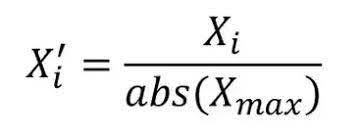

### When to Use:
- Especially useful for sparse data (lots of zeros)
- Preserves the sign of the data
- Does not shift/center the data, unlike mean normalization


In [27]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

# Sample DataFrame with sparse values
df = pd.DataFrame({'SparseData': [0, -3, 0, 5, 0]})

# Apply MaxAbsScaler
scaler = MaxAbsScaler()
df['Scaled'] = scaler.fit_transform(df[['SparseData']])

print(df)


   SparseData  Scaled
0           0     0.0
1          -3    -0.6
2           0     0.0
3           5     1.0
4           0     0.0


### Hinglish Tip:

- Jab data me minimum aur maximum range define ho, use **Min-Max Scaling**.
- Jab aapko mean ke around centered data chahiye, to use **Mean Normalization**.
- Aur jab sparse data ho jisme bahut saare zeros ho, **Max Absolute Scaling** is best.


## 4. Robust Scaling

---

### What is Robust Scaling?

Robust Scaling uses the **median** and **interquartile range (IQR)** for scaling the data, making it highly effective for **datasets with outliers**.

#### Formula:

```python
X_scaled = (X - Median) / IQR


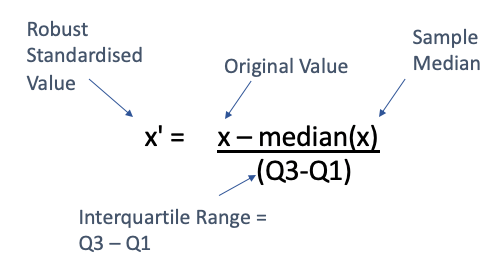

### Where:

- **Median** = 50th percentile
- **IQR** = 75th percentile − 25th percentile


### Characteristics:
- **Robust to Outliers**: Doesn’t get influenced by extreme values
- Doesn’t assume data is normally distributed
- Scales data around **median** rather than **mean**


In [29]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Sample DataFrame with outliers
df = pd.DataFrame({'Income': [30000, 35000, 40000, 1000000]})

# Apply RobustScaler
scaler = RobustScaler()
df['Scaled'] = scaler.fit_transform(df[['Income']])

print(df)


    Income    Scaled
0    30000 -0.030457
1    35000 -0.010152
2    40000  0.010152
3  1000000  3.908629


### Comparison: Normalization vs Standardization

| **Feature**             | **Normalization**                              | **Standardization**                          |
|-------------------------|------------------------------------------------|----------------------------------------------|
| **Goal**                | Scale to fixed range (e.g. [0,1])              | Center to mean 0, std dev 1                  |
| **Formula**             | (X − min) / (max − min)                        | (X − mean) / std                             |
| **Preserves Outliers**  | No                                             | No                                           |
| **Sensitive to Outliers**| Yes                                            | Yes                                          |
| **Best For**            | Known range                                    | Unknown distributions                        |


### Which Scaling to Use?

| **Situation**                | **Recommended Scaler**  |
|------------------------------|-------------------------|
| Known Min/Max values         | **MinMaxScaler**        |
| Unknown Distribution          | **StandardScaler**      |
| Presence of Outliers         | **RobustScaler**        |
| Sparse Data (many zeros)     | **MaxAbsScaler**        |


### Hinglish Tip:

- Agar aapke dataset me bahut zyada outliers hain, to **RobustScaler** use karna best hota hai kyunki ye median aur IQR ke basis par scale karta hai.
- Jab aapko value ka range pehle se pata ho, to **Min-Max** lagao.
- Aur jab pata hi nahi kya distribution hai, to **StandardScaler** best hai.
